<a href="https://colab.research.google.com/github/taimoorsardar/Machine-Learning-Projects/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_absolute_error as mae

from sklearn.linear_model import LinearRegression

#Data

##Data cleaning and preprocessing

make sure you have uploaded the Housing.csv file into the google colab or in any other space before running the following cells


In [ ]:
df = pd.read_csv('/content/Housing.csv')

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


now we check the missing values in object column

In [ ]:
# Identify object columns
object_columns = df.select_dtypes(include=['object']).columns

In [ ]:
# Check for unexpected values in object columns
for col in object_columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in mainroad: ['yes' 'no']
Unique values in guestroom: ['no' 'yes']
Unique values in basement: ['no' 'yes']
Unique values in hotwaterheating: ['no' 'yes']
Unique values in airconditioning: ['yes' 'no']
Unique values in prefarea: ['yes' 'no']
Unique values in furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


the data in object datatypes are fine

In [ ]:
# Check for missing values
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
# check for duplication
df.duplicated().sum()

0

## data visualization and analysis

<Axes: xlabel='area', ylabel='price'>

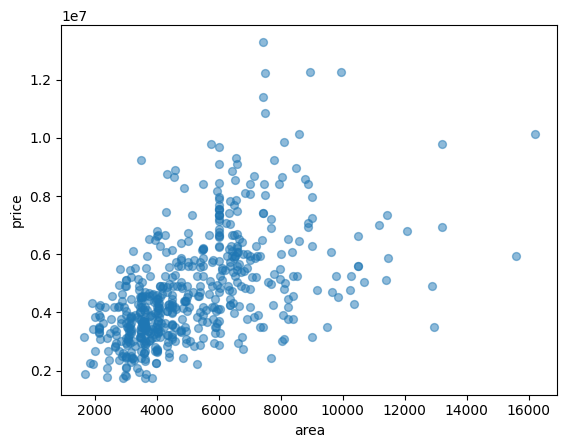

In [ ]:
df.plot(kind = 'scatter', x = 'area', y ='price', s= 32, alpha = 0.5) # x,y can be changes

<function matplotlib.pyplot.show(close=None, block=None)>

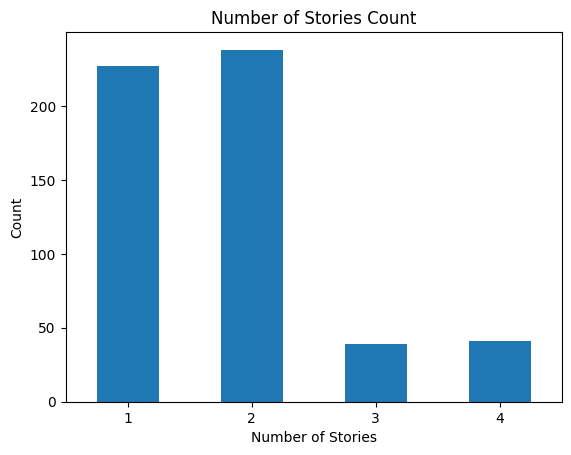

In [ ]:
stories_count = df['stories'].value_counts()
stories_count = stories_count.sort_index()
stories_count.plot(kind = 'bar')
plt.title('Number of Stories Count')
plt.xlabel('Number of Stories')
plt.ylabel('Count')

plt.xticks(rotation = 0)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

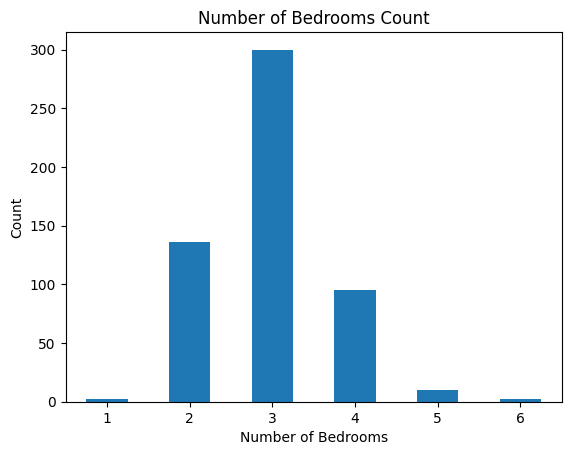

In [ ]:
bedrooms_count = df['bedrooms'].value_counts()
bedrooms_count = bedrooms_count.sort_index()
bedrooms_count.plot(kind = 'bar')
plt.title('Number of Bedrooms Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

plt.xticks(rotation = 0)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

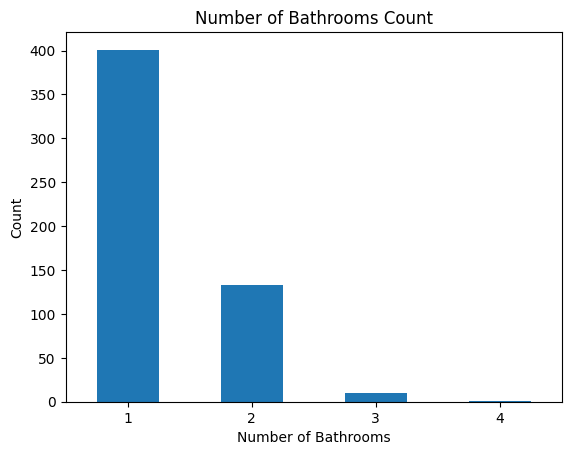

In [ ]:
bathrooms_count = df['bathrooms'].value_counts()
bathrooms_count = bathrooms_count.sort_index()
bathrooms_count.plot(kind = 'bar')
plt.title('Number of Bathrooms Count')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

plt.xticks(rotation = 0)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

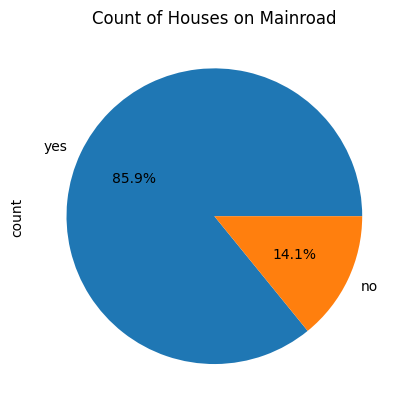

In [ ]:
mainroad_count = df['mainroad'].value_counts()
mainroad_count.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Count of Houses on Mainroad')
plt.show

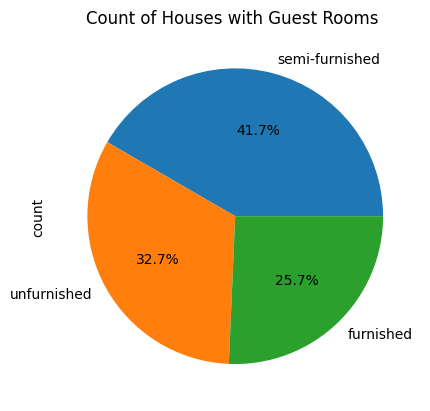

In [ ]:
furnishing_status = df['furnishingstatus'].value_counts()
furnishing_status.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Count of Houses with Guest Rooms ')
plt.show()

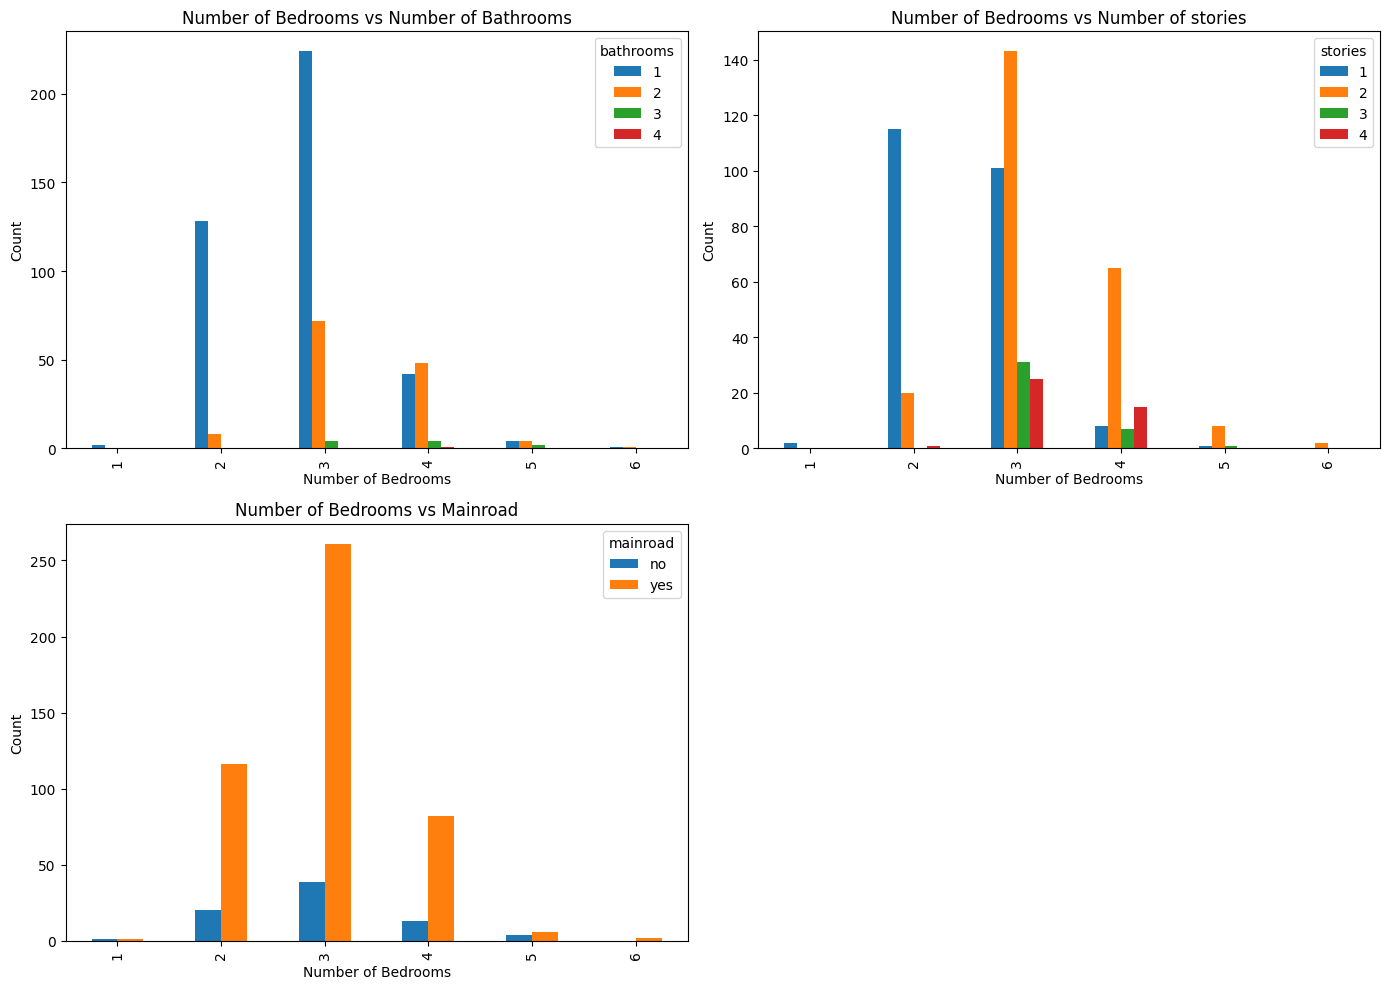

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14,10))
bedrooms_bathrooms = pd.crosstab(df['bedrooms'],df['bathrooms'])
bedrooms_bathrooms.plot(kind = 'bar',ax = axes[0,0])
axes[0,0].set_title('Number of Bedrooms vs Number of Bathrooms')
axes[0,0].set_xlabel('Number of Bedrooms')
axes[0,0].set_ylabel('Count')

bedrooms_stories = pd.crosstab(df['bedrooms'],df['stories'])
bedrooms_stories.plot(kind = 'bar',ax = axes[0,1])
axes[0,1].set_title('Number of Bedrooms vs Number of stories')
axes[0,1].set_xlabel('Number of Bedrooms')
axes[0,1].set_ylabel('Count')

bedrooms_mainroad = pd.crosstab(df['bedrooms'],df['mainroad'])
bedrooms_mainroad.plot(kind = 'bar',ax = axes[1,0])
axes[1,0].set_title('Number of Bedrooms vs Mainroad')
axes[1,0].set_xlabel('Number of Bedrooms')
axes[1,0].set_ylabel('Count')

axes[1,1].axis('off')
plt.tight_layout()
plt.show()

## Feature Engineering

In [ ]:
encoder = LabelEncoder()

In [ ]:
encoding_col = ['mainroad', 'guestroom',	'basement',	'hotwaterheating',	'airconditioning', 'prefarea', 'furnishingstatus' ]
for col in encoding_col:
  df[col] = encoder.fit_transform(df[col])

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [ ]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,int64
guestroom,int64
basement,int64
hotwaterheating,int64
airconditioning,int64


all are in int form now, the machine can learn easily now

In [ ]:
X = df.drop(columns =['price'],axis =1)
y = df['price']

now the dataset is divided into

*   X-> Features
*   y-> Label



In [ ]:
# Normalizing
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1,1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Model Selection and Training

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Model Evaluation

In [ ]:
# Evaluate the model
train_mse = mse(y_train, y_train_pred)
test_mse = mse(y_test, y_test_pred)

train_mae = mae(y_train, y_train_pred)
test_mae = mae(y_test, y_test_pred)

train_r2 = r2(y_train, y_train_pred)
test_r2 = r2(y_test, y_test_pred)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Training MAE: {train_mae}')
print(f'Test MAE: {test_mae}')
print(f'Training R2: {train_r2}')
print(f'Test R2: {test_r2}')

Training MSE: 0.007270499568586134
Test MSE: 0.013281243729270737
Training MAE: 0.06217719461071735
Test MAE: 0.08482075249315932
Training R2: 0.6854429472843788
Test R2: 0.6494754192267794


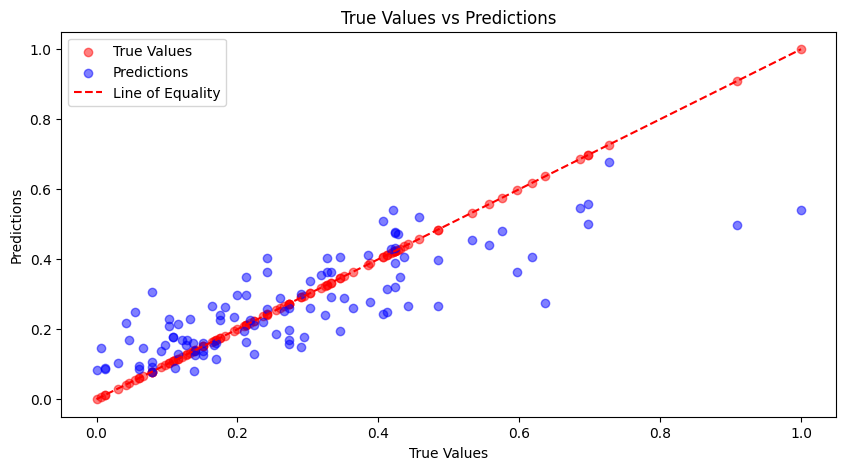

In [ ]:
plt.figure(figsize=(10, 5))

# Scatter plot for true values
plt.scatter(y_test, y_test, color='red', label='True Values', alpha=0.5)

# Scatter plot for predictions
plt.scatter(y_test, y_test_pred, color='blue', label='Predictions', alpha=0.5)

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')

# Add a line of equality
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Line of Equality')

plt.legend()
plt.show()


# THE END